# Descripción del Proyecto
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.
Necesitamos predecir si un cliente dejará el banco pronto. Tenemos los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.
Crearemos un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitamos un valor F1 de al menos 0.59.  Verificaremos F1 para el conjunto de prueba.
Además, mediremos la métrica AUC-ROC y la compararemos con el valor F1.

<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cargar los datos</a></span></li><li><span><a href="#Revisión-y-corrección-de-datos" data-toc-modified-id="Revisión-y-corrección-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Revisión y corrección de datos</a></span></li><li><span><a href="#Buscando-el-mejor-modelo" data-toc-modified-id="Buscando-el-mejor-modelo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Buscando el mejor modelo</a></span><ul class="toc-item"><li><span><a href="#Configurando-el-set-de-entrenamiento-y-validación" data-toc-modified-id="Configurando-el-set-de-entrenamiento-y-validación-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Configurando el set de entrenamiento y validación</a></span></li><li><span><a href="#Modelo-de-Regresión-logistica" data-toc-modified-id="Modelo-de-Regresión-logistica-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modelo de Regresión logistica</a></span></li><li><span><a href="#Desequilibrio-de-clases" data-toc-modified-id="Desequilibrio-de-clases-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Desequilibrio de clases</a></span></li><li><span><a href="#Modelo-de-Arbol-de-decisión-(entrenado-con-datos-balanceados)" data-toc-modified-id="Modelo-de-Arbol-de-decisión-(entrenado-con-datos-balanceados)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Modelo de Arbol de decisión (entrenado con datos balanceados)</a></span></li><li><span><a href="#Modelo-de-Bosques-aleatorios-(entrenado-con-datos-balanceados)" data-toc-modified-id="Modelo-de-Bosques-aleatorios-(entrenado-con-datos-balanceados)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Modelo de Bosques aleatorios (entrenado con datos balanceados)</a></span></li></ul></li><li><span><a href="#Metrica-AUC-ROC" data-toc-modified-id="Metrica-AUC-ROC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metrica AUC-ROC</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusión</a></span></li></ul></div>

## Inicialización

In [1]:
# Cargamos todas las librerías a usar
import pandas as pd
from IPython.display import display, HTML, Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#Definimos una función Print que sea visualmente mas amigable
def print_mejorado(texto,size):
    size=str(size)
    display(HTML('<span style="font-size: '+size+'px;">'+texto+'</span>'))  

## Cargar los datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
data=pd.read_csv('/datasets/Churn.csv')

## Revisión y corrección de datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# Imprimimos una muestra pequeña de nuestros datos
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<b>Características</b>  
- <i>RowNumber</i>: índice de cadena de datos  
- <i>CustomerId</i>: identificador de cliente único  
- <i>Surnam</i>e: apellido  
- <i>CreditScore</i>: valor de crédito  
- <i>Geography</i>: país de residencia  
- <i>Gender</i>: sexo  
- <i>Age</i>: edad  
- <i>Tenure</i>: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)  
- <i>Balance</i>: saldo de la cuenta  
- <i>NumOfProducts</i>: número de productos bancarios utilizados por el cliente  
- <i>HasCrCard</i>: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)  
- <i>IsActiveMember</i>: actividad del cliente (1 - sí; 0 - no)  
- <i>EstimatedSalary</i>: salario estimado  

<b>Objetivo</b>
- <i>Exited</i>: El cliente se ha ido (1 - sí; 0 - no)

Vemos que faltan 909 filas (app 10% de los datos) con información para la columna `Tenure`. Podría intentar inferir los valores ausentes, reemplazarlos con el valor promedio o la mediana, sin embargo, no estoy seguro de que forma puede afectar esto al entrenamiento/desempeño de nuestro futuro modelo. Por este motivo, ademas de temas de simplicidad, procederé a eliminar estas filas. 

In [6]:
data=data.dropna(subset=['Tenure'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [7]:
#Creamos funcion para visualizar rapidamente histogramas y datos descriptivos de cada columnas numericas
def histo_des(df):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    df.hist(ax=ax1,bins=20, figsize=(20,5))
    ax1.set_xlabel('Valores')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title(df.name)
    
    ax2.axis('off')
    ax2.text(0, 0.5, str(df.describe()), fontsize=20, va='center')
    plt.subplots_adjust(wspace=0.5)
    plt.show()

In [8]:
data['RowNumber'].nunique()

9091

Cada fila tiene un RowNumber diferente, esto es correcto.

In [9]:
data['CustomerId'].nunique()

9091

Todos los CustomerId son diferentes, lo cual nos garantiza que no se ha duplicado la información de ningun cliente.

In [10]:
data['Surname'].nunique()

2787

En nuestra tabla figuran 2787 apellidos diferentes para los clientes.

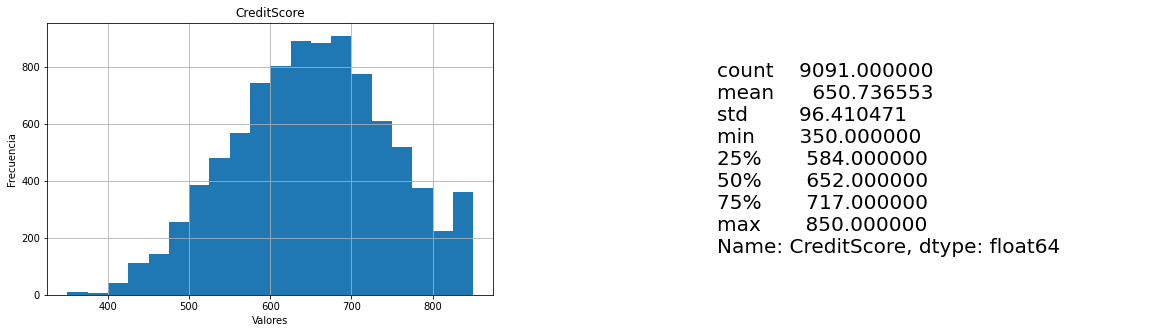

In [11]:
histo_des(data['CreditScore'])

El CreditScore varia entre 350 y 850.

In [12]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

En esta variable categorica hay solo 3 localidades (Francia, España y Alemania)

In [13]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

En esta variable categorica hay solo dos géneros (Male, Female) y no hay ningun valor ausente.

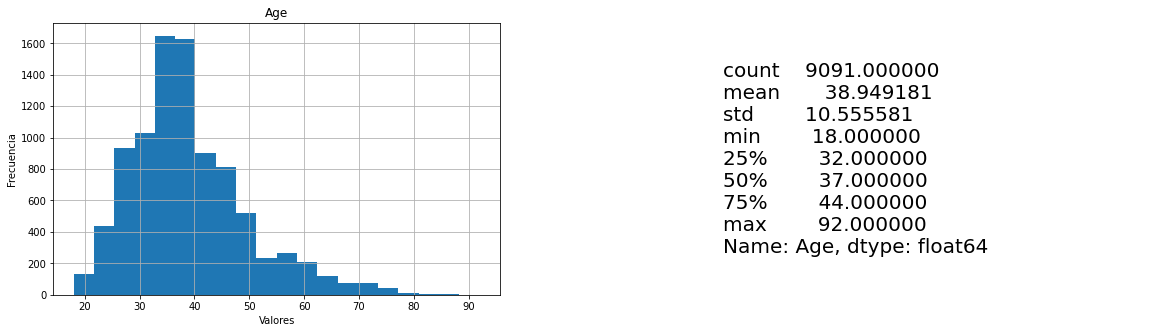

In [14]:
histo_des(data['Age'])

La edad de los clientes varia entre los 18 y los 92 años. El cliente típico ronda los 37 años.

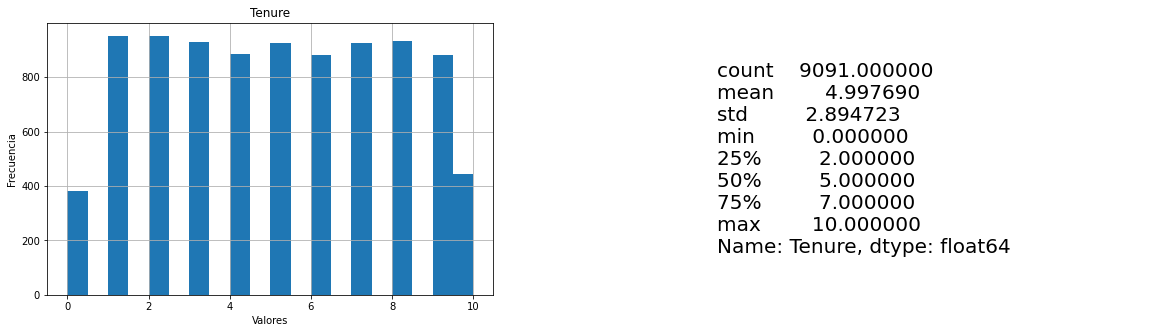

In [15]:
histo_des(data['Tenure'])

Los depositos a plazo de los cliente varia entre 0 años y 10 años.

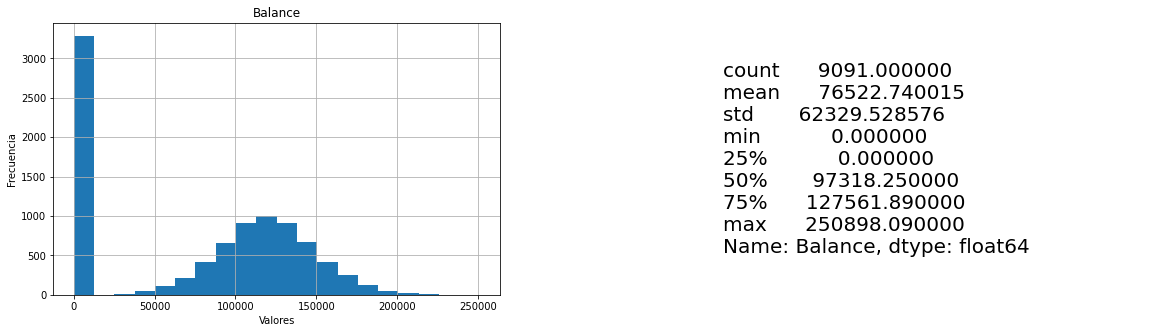

In [16]:
histo_des(data['Balance'])

El balance de los clientes muestra valores entre 0 y 250000 app.

In [17]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

Los cliente tienen entre 1 y 4 productos.

In [18]:
data['HasCrCard'].unique()

array([1, 0])

Hay solo dos estados para HasCrCard, esto es correcto.

In [19]:
data['IsActiveMember'].unique()

array([1, 0])

Hay solo dos estados para IsActiveMember, esto es correcto.

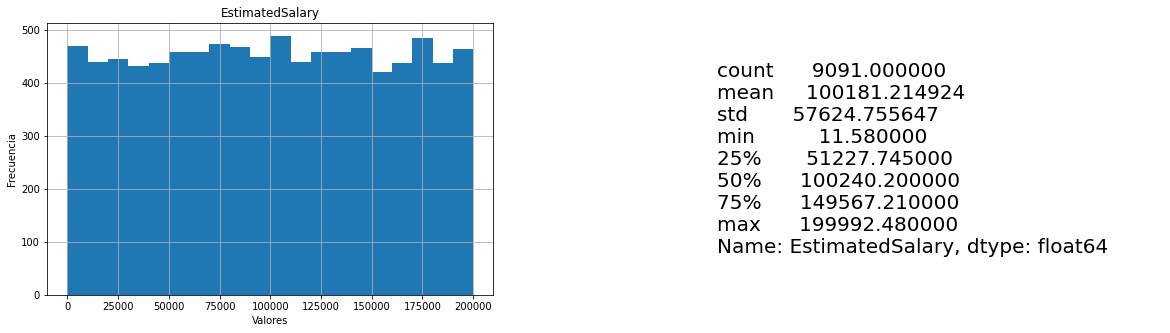

In [20]:
histo_des(data['EstimatedSalary'])

El salario estimado de los clientes muestra valores entre 11 y 200000 app.

In [21]:
data['Exited'].unique()

array([1, 0])

Hay solo dos estados para Exited esto es correcto.

Los valores de nuestra tabla muestran valores correctos. No hay valores duplicados, erroneos o valores fuera de los rangos esperados. Podemos comenzar a construir nuestros modelos.

## Buscando el mejor modelo

### Configurando el set de entrenamiento y validación

Nuestro modelo debe ser capaz de predecir si un cliente dejará o no el banco pronto en base a su información financiera. Para efectos de entrenaniemto, las columnas `RowNumber`, `CustomerId` y `Surname` no son necesarias ni determinantes, por lo tanto, procederé a descartarlas.

In [22]:
data2=data.drop(['RowNumber','CustomerId','Surname'], axis=1)

En nuestra data tenemos 2 variables categoricas en las columnas `Geography`(3 categorias) y`Gender`(2 categorias). Procederé a transformar estas variables en características numéricas usando la técnica One-Hot Enconder (OHE) la cual crea columnas con 1 o 0, dependiendo de si esta presente (o no) esta caracteristica, de forma similar a como ya lo hacen las columnas  `HasCrCard`,`IsActiveMember` y`Exited`.

In [23]:
data_ohe=pd.get_dummies(data2, drop_first=True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Separamos nuestro set de datos en un 80% para entrenamiento y un 20% para validación.

In [24]:
train, valid = train_test_split(data_ohe, test_size=0.2, random_state=12345)

features_train = train.drop('Exited', axis=1)
target_train = train['Exited']
features_valid = valid.drop('Exited', axis=1)
target_valid = valid['Exited']

Para evitar que al momento del entrenamiento alguna caracteristica numerica tenga mas influencia o relevancia que otra debido a las diferentes escalas, realizaremos una estandarización de todas las variables usando la clase StandardScaler de sklearn.
El escalado será aplicado a las siguientes columnas: `CreditScore`, `Age`,`Tenure`,`Balance`,`NumOfProducts`y`EstimatedSalary`.

In [25]:
numeric = ['CreditScore', 'Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7702,2.074009,-0.755896,1.032080,-1.235435,0.806573,1,0,1.351774,0,0,1
4303,-0.790263,1.609084,-0.688132,1.249209,-0.909459,0,1,0.257662,0,1,1
7470,2.074009,0.757691,-0.344090,0.358445,0.806573,1,1,0.373276,1,0,0
5189,1.825841,0.190096,-0.000047,1.117429,0.806573,0,0,1.391016,0,1,1
699,0.957253,-0.566697,-1.720259,1.682729,-0.909459,1,1,0.122738,1,0,1


### Modelo de Regresión logistica

In [26]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

accuracy_valid = accuracy_score(target_valid, predicted_valid)
recall_valid =recall_score(target_valid,predicted_valid)
precision_valid =precision_score(target_valid,predicted_valid)
f1_valid =f1_score(target_valid,predicted_valid)

print_mejorado(f'Exactitud: {accuracy_valid}',20)
print_mejorado(f'Recall: {recall_valid}',20)
print_mejorado(f'Precisión: {precision_valid}',20)
print_mejorado(f'F1: {f1_valid}',20)

Nuestro primer modelo muestra una exactitud de 0.81, sin embargo, los valores de recall y precisión indican que nuestro modelo no funciona correctamente.  
  
-Recall describe qué tan bien comprende un modelo las propiedades de esta clase y es capaz de reconocerla.  
-Precisión detecta si un modelo está exagerando el reconocimiento de clase positiva al asignar demasiadas etiquetas positivas.  
  
El indicador F1 es la media armónica de recall y precisión. En F1, 1 significa que la relación de recall a precisión es 1:1.  
En terminos simples, mientras mas cercano a 1 es el indicador F1, mejor es nuestro modelo, y de aquí en adelante, nos concentraremos en maximizar este indicador. **Para nuestro modelo actual, el indicador F1 es bastante pobre, alcanzando un valor de 0.32.**

### Desequilibrio de clases

Nuestra columna objetivo es `Exited`, donde 0 corresponde a que el cliente continua y 1 que dejó el banco. Veamos cuantas columnas de cada tipo hay en nuestro dataset.

In [27]:
num_no_exit=len(data[data['Exited']==0])
num_exit=len(data[data['Exited']==1])

print_mejorado( f'{num_no_exit} filas de cliente que no se marcharon',20)
print_mejorado( f'{num_exit} filas de cliente que se marcharon',20)

Como podemos ver, tenemos mucha mas información de clientes que no se marcharon, respecto a los que si, en una relación de 80%-20%. Es decir, si crearamos un modelo simple que respondierá siempre que el cliente no se marchará. Este modelo acertaría el 80% de las veces. Esto no tiene sentido. Por esto motivo es necesario **balancear** la muestra, de forma tal que los datos de entranamiento posean un numero equivalente de filas para cada caso.  
Se utilizaran dos técnicas simultaneamente para esta tarea,estas son:  
  
  
-Submuestreo: Eliminar aleatoriamente una pequeña porción de los datos mas recurrentes  
-Sobremuestreo: Replicar algunas filas de los datos menos recurrentes.

Crearé dos funciones simples para realizar esto:

In [28]:
#Submuestreo
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones])
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [29]:
#Sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

Una vez creada las funciones, las aplicaré a nuestros conjunto de entrenamiento, de manera que triplique los datos menos recurrentes (unos) y eliminé un 10% de los datos menos recurrentes (ceros).  

*Nota: estos valores fueron elegidos luego de varias iteraciones y son los que entregan mejores resultados al momento de entrenar.*

In [30]:
features_train_up,target_train_up = upsample(features_train, target_train, 3)
features_train_updown,target_train_updown = downsample(features_train_up, target_train_up, 0.9)

Entrenamos con el nuevo set de entrenamiento.

In [31]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_updown, target_train_updown)

predicted_valid = model.predict(features_valid)

accuracy_valid = accuracy_score(target_valid, predicted_valid)
recall_valid =recall_score(target_valid,predicted_valid)
precision_valid =precision_score(target_valid,predicted_valid)
f1_valid =f1_score(target_valid,predicted_valid)

print_mejorado(f'F1: {f1_valid}',20)

Nuestro modelo de regresión logistica mejoró significativamente luego de aplicar las técnicas de balanceo antes explicadas. Sin embargo, aun no alcanzá lo valores de desempeño requeridos por la empresa. 
A continuación evaluaremos el desempeño de otro modelos (Arbol de decisión y Bosques aleatorios) y veremos si cumplen con lo requerido. **Para entrenar estos modelos utilizaremos nuestro set de entrenamiento balanceado.**

### Modelo de Arbol de decisión (entrenado con datos balanceados)

Para encontrar el mejor modelo, entrenaremos árboles de distintas profundidades y nos quedaremos con el que mejor.

In [32]:
depth_mejor=0
f1_mejor=0
for i in range(1,15):
    
    #entrenamos el modelo
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(features_train_updown, target_train_updown)
    
    #Aplicamos nuestro modelo al conjunto de validación
    predictions_valid = model.predict(features_valid)
    
    #Calculamos el valor F1
    f1_valid =f1_score(target_valid,predictions_valid)
    print(f'F1 con profundidad de = {i} : {f1_valid}')

    if f1_valid>f1_mejor:
        f1_mejor=f1_valid
        depth_mejor=i

print('')    
print_mejorado(f'El mejor valor F1 se obtiene con una profundidad de {depth_mejor}',20)
print_mejorado(f'F1: {f1_mejor:.3f}',20)    

F1 con profundidad de = 1 : 0.48893572181243417
F1 con profundidad de = 2 : 0.51340206185567
F1 con profundidad de = 3 : 0.5285868392664509
F1 con profundidad de = 4 : 0.5337026777469991
F1 con profundidad de = 5 : 0.5966587112171837
F1 con profundidad de = 6 : 0.5492125984251969
F1 con profundidad de = 7 : 0.5761957730812013
F1 con profundidad de = 8 : 0.567032967032967
F1 con profundidad de = 9 : 0.5624296962879641
F1 con profundidad de = 10 : 0.5452562704471102
F1 con profundidad de = 11 : 0.534521158129176
F1 con profundidad de = 12 : 0.5197740112994351
F1 con profundidad de = 13 : 0.5307068366164542
F1 con profundidad de = 14 : 0.5162037037037037



Nuestro modelo de Arbol de decisión de profundidad 5 (apenas) ya cumple con lo que requerido, sin embargo, evaluaremos el modelo de bosques aleatorios y veremos si el desempeño mejora.

### Modelo de Bosques aleatorios (entrenado con datos balanceados)

Para este modelo, entrenaré varios modelos con distintos hiperparametros de profundidad (max_depth) y cantidad de arboles (n_estimators) y nos quedaremos con el mejor.

In [33]:
n_mejor=0
f1_mejor=0
depth_mejor=0

for i in range(2,6):
    for est in range(1, 20): # selecciona el rango del hiperparámetro
        #configuramos el número de árboles (n-estimators)
        model = RandomForestClassifier(random_state=12345,  max_depth=i, n_estimators=est)

        #entrenamos el modelo en el conjunto de entrenamiento
        model.fit(features_train_updown,target_train_updown)

        #Aplicamos nuestro modelo al conjunto de validación
        predictions_valid = model.predict(features_valid)

        #Calculamos el valor F1
        f1_valid =f1_score(target_valid,predictions_valid)

        print(f'F1 con {est} n_estimators y depth {i}: {f1_valid}')

        if f1_valid>f1_mejor:
                f1_mejor=f1_valid
                n_mejor=est
                depth_mejor=i

print('')    
print_mejorado(f'El mejor valor F1 se obtiene con un n_estimators de {n_mejor} y una profundidad de {depth_mejor}',20)
print_mejorado(f'F1: {f1_mejor:.3f}',20)

F1 con 1 n_estimators y depth 2: 0.4293915040183697
F1 con 2 n_estimators y depth 2: 0.4922341696535245
F1 con 3 n_estimators y depth 2: 0.5168018539976825
F1 con 4 n_estimators y depth 2: 0.55
F1 con 5 n_estimators y depth 2: 0.5634146341463414
F1 con 6 n_estimators y depth 2: 0.5615763546798029
F1 con 7 n_estimators y depth 2: 0.5680933852140078
F1 con 8 n_estimators y depth 2: 0.5898491083676269
F1 con 9 n_estimators y depth 2: 0.576923076923077
F1 con 10 n_estimators y depth 2: 0.5818673883626523
F1 con 11 n_estimators y depth 2: 0.573248407643312
F1 con 12 n_estimators y depth 2: 0.5826558265582655
F1 con 13 n_estimators y depth 2: 0.5879120879120878
F1 con 14 n_estimators y depth 2: 0.5888594164456233
F1 con 15 n_estimators y depth 2: 0.5671641791044777
F1 con 16 n_estimators y depth 2: 0.5487364620938628
F1 con 17 n_estimators y depth 2: 0.5507246376811594
F1 con 18 n_estimators y depth 2: 0.5658056580565807
F1 con 19 n_estimators y depth 2: 0.5630354957160342
F1 con 1 n_estimat

El desempeño de este último modelo es el mejor de los 3. Haré una ultima prueba de precisión del modelo, evaluando el conjunto de datos de entrenamiento y el de validación para ver si hay sobreajuste excesivo.

In [34]:
model_forest = RandomForestClassifier(random_state=12345,  max_depth=4, n_estimators=13)
model_forest.fit(features_train_updown,target_train_updown)

#Evaluamos la precisión del modelo de bosques aleatorios usando el conjunto de prueba y de entrenamiento
predictions_valid = model_forest.predict(features_valid)
precision_forest = accuracy_score(target_valid, predictions_valid)
print(f'La precisión del modelo bosques aleatorios con los datos de validación fue del {precision_forest*100:.1f}%')

predictions_train = model_forest.predict(features_train)
precision_forest = accuracy_score(target_train, predictions_train)
print(f'La precisión del modelo bosques aleatorios con los datos de entrenamiento fue del {precision_forest*100:.1f}%') 

La precisión del modelo bosques aleatorios con los datos de validación fue del 83.7%
La precisión del modelo bosques aleatorios con los datos de entrenamiento fue del 83.4%


El desempeño del este modelo con los datos de validación (datos nunca vistos) fue incluso mejor que con los datos de entranamiento.Con lo que nos aseguramos que el desempeños de nuestro modelo es adecuado y no tiene sobreajuste.  
  
  
**Nos quedaremos entonces con el modelo de bosques aleatorios de profundidad 4 y 13 arboles.**

## Metrica AUC-ROC

Finalmente trazaremos las curva ROC y la compararemos con la curva de un modelo aleatorio para finalmente calcular la metrica AUC-ROC usando sklearn.

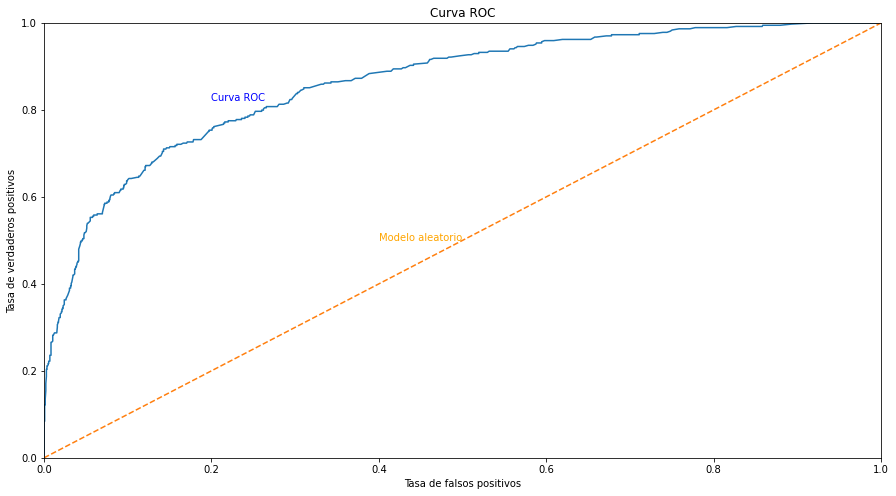

In [35]:
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds =roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr)

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')

plt.text(0.2, 0.82, 'Curva ROC', color='blue')
plt.text(0.4, 0.5, 'Modelo aleatorio', color='orange')

plt.show()

En la figura anterior, la Curva ROC de nuestro modelo esta por sobre la de un modelo que responde al azar, lo cual indica que nuestro modelo es de alta calidad.

In [36]:
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print_mejorado(f'Metrica AUC_ROC: {auc_roc:.3f}',20)

Finalmente, la métrica AUC_ROC para nuestro modelo de bosque aleatorio fue de 0.861.

## Conclusión

El modelo que fue capaz de cumplir con los requerimentos de la empresa fue el **Modelo de bosques aleatorios con una profundidad de 4 y 13 estimadores.** Sin embargo, para entrenar este modelo, fue necesario primero balancear los datos de entrenamiento, dado que los datos proporcionados contenian porporcionalmente muy pocas filas de información de clientes que habian abandonado con respecto a la data general. Para esto, se aplicaron tecnicas de submuestreo y sobremuestro. Finalmente, analizando la curva ROC y la metrica AUC_ROC, nos aseguramos que el modelo obtenido fue un modelo de calidad.